<h1>Workflow</h1>

1. Data cleaning
2. Pre-processing
3. Data analysis and feature engineering
4. Train test split
5. Classification model
6.  Evaluation


In [1]:
# Credit Card Fraud Detection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



   <h2> Data Exploration </h2> 

In [2]:
cred_data = pd.read_csv("training_data.csv")

In [3]:
cred_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,...,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,...,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,...,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,...,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,...,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54


In [4]:
cred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57116 entries, 0 to 57115
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57116 non-null  int64  
 1   V1      57116 non-null  float64
 2   V2      57116 non-null  float64
 3   V3      57116 non-null  float64
 4   V4      57116 non-null  float64
 5   V5      57116 non-null  float64
 6   V6      57116 non-null  float64
 7   V7      57116 non-null  float64
 8   V8      57116 non-null  float64
 9   V9      57116 non-null  float64
 10  V10     57116 non-null  float64
 11  V11     57116 non-null  float64
 12  V12     57116 non-null  float64
 13  V13     57116 non-null  float64
 14  V14     57116 non-null  float64
 15  V15     57116 non-null  float64
 16  V16     57116 non-null  float64
 17  V17     57116 non-null  float64
 18  V18     57116 non-null  float64
 19  V19     57116 non-null  float64
 20  V20     57116 non-null  float64
 21  V21     57116 non-null  float64
 22

In [5]:
# no null values
cred_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,...,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000
mean,34983.116097,-0.247795,-0.022058,0.679284,0.169507,-0.269839,0.099197,-0.111731,0.053520,0.013406,...,0.044174,-0.029317,-0.106932,-0.037896,0.006357,0.134607,0.021532,0.002800,0.001178,96.941060
std,14565.105294,1.864050,1.631035,1.410986,1.373157,1.377401,1.301175,1.247802,1.249071,1.157104,...,0.756907,0.746801,0.639153,0.626419,0.597128,0.439791,0.497490,0.379231,0.295386,270.411899
min,0.000000,-36.802320,-63.344698,-33.680984,-5.172595,-42.147898,-23.496714,-31.764946,-73.216718,-9.283925,...,-15.806476,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-7.976100,-9.617915,0.000000
25%,28865.000000,-1.009543,-0.589424,0.192506,-0.723950,-0.887752,-0.640141,-0.601216,-0.143972,-0.675191,...,-0.169140,-0.226106,-0.525390,-0.177981,-0.324780,-0.129791,-0.329274,-0.063496,-0.006171,7.600000
50%,38190.500000,-0.246743,0.074316,0.768041,0.189497,-0.301686,-0.151700,-0.071382,0.065374,-0.073948,...,-0.024862,-0.060934,-0.081307,-0.049691,0.062927,0.172505,-0.076244,0.009027,0.022540,26.265000
75%,46008.250000,1.153809,0.724232,1.399763,1.052439,0.268297,0.491501,0.423102,0.345135,0.663857,...,0.169582,0.115353,0.307514,0.080841,0.403506,0.421531,0.300119,0.082192,0.075379,88.000000
max,54280.000000,1.634039,18.902453,4.101716,16.715537,34.099309,22.529298,36.677268,20.007208,10.392889,...,39.420904,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,19656.530000


In [6]:
cred_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

C:\Users\ajayc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


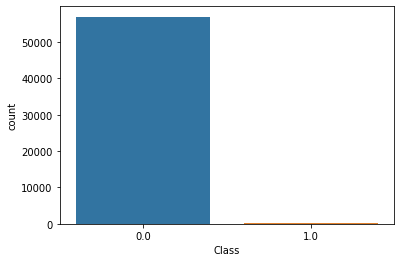

In [7]:
Class=pd.read_csv("train_data_classlabels.csv")
Class.value_counts()
Data=pd.concat([cred_data, Class], axis=1)
sns.countplot(Data["Class"]);

# 1- fraudulent
# 0- legitimate

<h2>Scaling features - Amount & Time</h2>

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
Data['scaled_amount'] = rob_scaler.fit_transform(Data['Amount'].values.reshape(-1,1))
Data['scaled_time'] = rob_scaler.fit_transform(Data['Time'].values.reshape(-1,1))
Data.drop(['Time','Amount'], axis=1, inplace=True)
Data.head()
Data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,...,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000
mean,-0.247795,-0.022058,0.679284,0.169507,-0.269839,0.099197,-0.111731,0.053520,0.013406,-0.036260,...,-0.106932,-0.037896,0.006357,0.134607,0.021532,0.002800,0.001178,0.002486,0.879055,-0.187093
std,1.864050,1.631035,1.410986,1.373157,1.377401,1.301175,1.247802,1.249071,1.157104,1.082726,...,0.639153,0.626419,0.597128,0.439791,0.497490,0.379231,0.295386,0.049800,3.363332,0.849612
min,-36.802320,-63.344698,-33.680984,-5.172595,-42.147898,-23.496714,-31.764946,-73.216718,-9.283925,-16.649628,...,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-7.976100,-9.617915,0.000000,-0.326679,-2.227728
25%,-1.009543,-0.589424,0.192506,-0.723950,-0.887752,-0.640141,-0.601216,-0.143972,-0.675191,-0.508375,...,-0.525390,-0.177981,-0.324780,-0.129791,-0.329274,-0.063496,-0.006171,0.000000,-0.232152,-0.543975
50%,-0.246743,0.074316,0.768041,0.189497,-0.301686,-0.151700,-0.071382,0.065374,-0.073948,-0.095664,...,-0.081307,-0.049691,0.062927,0.172505,-0.076244,0.009027,0.022540,0.000000,0.000000,0.000000
75%,1.153809,0.724232,1.399763,1.052439,0.268297,0.491501,0.423102,0.345135,0.663857,0.439654,...,0.307514,0.080841,0.403506,0.421531,0.300119,0.082192,0.075379,0.000000,0.767848,0.456025
max,1.634039,18.902453,4.101716,16.715537,34.099309,22.529298,36.677268,20.007208,10.392889,12.925140,...,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,1.000000,244.157525,0.938533


In [9]:
# this is an unbalanced dataset
legit = Data[Data["Class"] == 0]
fraud = Data[Data["Class"] == 1]


print(f'Legit: {fraud.Class.value_counts()[1]} & Fraud : {legit.Class.value_counts()[0]}')

Legit: 142 & Fraud : 56974


In [10]:
legit.shape

(56974, 31)

In [11]:
legit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,56974.000000,56974.000000,56974.000000,56974.000000,56974.000000,56974.000000,56974.000000,56974.000000,56974.000000,56974.000000,...,56974.000000,56974.000000,56974.000000,56974.000000,56974.000000,56974.000000,56974.000000,56974.0,56974.000000,56974.000000
mean,-0.231008,-0.034844,0.704876,0.156111,-0.257629,0.105005,-0.093744,0.044540,0.021640,-0.019049,...,-0.106587,-0.037273,0.006573,0.134248,0.021278,0.001243,0.001023,0.0,0.879141,-0.186330
std,1.789913,1.598623,1.245375,1.341018,1.319257,1.295342,1.148208,1.209324,1.139605,1.003389,...,0.638653,0.620617,0.597303,0.437408,0.497724,0.373992,0.294280,0.0,3.364573,0.849464
min,-36.802320,-63.344698,-33.680984,-5.172595,-42.147898,-23.496714,-31.764946,-73.216718,-6.290730,-14.741096,...,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-7.976100,-9.617915,0.0,-0.326679,-2.227728
25%,-1.005406,-0.591583,0.197692,-0.726452,-0.885125,-0.636364,-0.598009,-0.144176,-0.671535,-0.504868,...,-0.525249,-0.177610,-0.324762,-0.129646,-0.329463,-0.063593,-0.006167,0.0,-0.232027,-0.542283
50%,-0.242429,0.072443,0.770905,0.184610,-0.300544,-0.149550,-0.069860,0.064842,-0.071726,-0.094580,...,-0.081203,-0.049593,0.062941,0.172414,-0.076673,0.008818,0.022481,0.0,0.000622,0.000262
75%,1.154348,0.719204,1.401675,1.046190,0.268802,0.492968,0.423923,0.343095,0.666197,0.441744,...,0.307422,0.080795,0.403586,0.421049,0.299327,0.081574,0.074970,0.0,0.767040,0.456710
max,1.634039,18.902453,4.101716,16.715537,34.099309,22.529298,36.677268,17.941363,10.392889,12.925140,...,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,0.0,244.157525,0.938533


In [12]:
fraud.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,142.000000,142.000000
mean,-6.983068,5.108252,-9.589043,5.544330,-5.168831,-2.231451,-7.328468,3.656380,-3.290294,-6.941655,...,-0.245639,-0.287868,-0.080482,0.278531,0.123823,0.627499,0.063417,1.0,0.844713,-0.493247
std,8.195007,4.289849,8.562185,2.824803,6.405864,1.529773,6.738501,5.286635,2.562873,4.462378,...,0.806222,1.804257,0.516401,1.009314,0.380310,1.159949,0.589556,0.0,2.831316,0.856728
min,-30.552380,-5.198360,-31.103685,0.217805,-22.105532,-4.977692,-21.922811,-3.277535,-9.283925,-16.649628,...,-2.288686,-19.254328,-1.632653,-4.781606,-0.657488,-3.908080,-1.552593,1.0,-0.326679,-2.204045
25%,-11.563027,1.827869,-13.933314,3.288919,-8.662243,-3.199953,-13.599423,0.169045,-5.510218,-11.431831,...,-0.712570,-0.549727,-0.370337,-0.232315,-0.220332,0.061335,-0.049185,1.0,-0.314241,-1.223105
50%,-3.980294,4.139912,-6.810917,5.856043,-2.987013,-2.379765,-5.601373,1.341652,-3.194462,-6.361539,...,-0.136265,-0.130498,0.037925,0.307378,0.155336,0.568276,0.207408,1.0,-0.278669,-0.505272
75%,-1.070969,7.374918,-2.902922,7.060423,-0.205238,-1.172794,-1.673974,5.516612,-1.277438,-3.286513,...,0.344117,0.190833,0.235568,0.970498,0.486445,1.424552,0.413970,1.0,0.916978,0.186400
max,1.243848,16.713389,2.041003,11.927512,5.269255,3.628382,5.431271,20.007208,2.820829,1.077418,...,1.481271,2.661291,0.795190,2.208209,0.816762,3.052358,1.130625,1.0,22.181779,0.902250


<h2> Under sampling </h2>


Build a sample dataset from original one containing similar distributions of normal and fraudulent transactions(492-lower) nature of the dataset must not change

In [13]:
legit_sample = legit.sample(n=142)
legit_sample.Class.value_counts()

0.0    142
Name: Class, dtype: int64

In [14]:
new_cred = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_cred.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
44229,1.052701,-0.494169,1.136549,0.935094,-1.310836,-0.325284,-0.651884,0.151463,1.181577,-0.220731,...,-0.244427,-0.007314,0.372537,0.172762,0.315955,-0.006654,0.035005,0.0,0.606032,0.635031
20483,-4.299105,-3.869931,-1.313339,1.520416,4.913948,1.484448,-1.749094,1.586840,-0.817312,-0.666900,...,-0.873400,0.288786,0.894340,0.175480,-0.356774,0.287530,-0.541360,0.0,2.330784,0.138918
53771,-3.845978,-6.223465,-3.613206,-0.886076,-4.335467,7.004014,7.757993,0.039903,-2.403541,-1.858425,...,0.222772,5.046707,0.774296,1.430011,-0.164104,-0.753176,0.203660,0.0,28.309888,0.193225
43342,-0.058743,0.558476,0.583915,0.607417,1.539524,4.778817,-1.554582,-0.536208,1.569498,-0.453284,...,-1.052589,-0.170445,0.936855,1.088399,-0.165623,0.230290,0.195295,0.0,0.046331,-0.894784
15480,-0.630707,0.136166,1.589928,-0.073601,0.651752,1.900664,0.636799,0.478990,-0.203405,-0.510651,...,0.283499,0.148025,-1.018706,-0.365528,0.310083,-0.101058,-0.189263,0.0,0.816978,0.785528


In [16]:
new_cred.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,-3.528802,2.534161,-4.444949,2.885280,-2.739398,-1.010544,-3.735177,1.884047,-1.616185,-3.454828,...,-0.183661,-0.156333,-0.023549,0.215149,0.117107,0.322438,0.032708,0.500000,0.892351,-0.364414
std,6.849793,4.109063,7.987738,3.423496,5.210114,1.902841,6.018439,4.170884,2.571054,4.772940,...,0.710740,1.337138,0.545285,0.777589,0.464198,0.891850,0.427928,0.500883,2.912758,0.895521
min,-30.552380,-6.223465,-31.103685,-3.421195,-22.105532,-4.977692,-21.922811,-5.563412,-9.283925,-16.649628,...,-2.288686,-19.254328,-1.690288,-4.781606,-0.953627,-3.908080,-1.552593,0.000000,-0.326679,-2.209820
25%,-4.220332,-0.030776,-6.770656,0.241648,-3.287019,-2.383756,-5.576403,-0.070074,-3.166936,-6.340623,...,-0.608306,-0.301535,-0.314072,-0.141468,-0.235289,-0.023997,-0.007206,0.000000,-0.314241,-0.985432
50%,-1.028590,0.947659,-0.483403,1.560488,-0.795993,-0.776645,-0.831520,0.304857,-0.694979,-0.684799,...,-0.098162,-0.074034,0.066379,0.225547,0.037812,0.061657,0.038050,0.500000,-0.038682,-0.132880
75%,1.025776,4.159366,0.909868,5.832706,0.116862,0.000218,0.055448,1.410269,0.206771,-0.109740,...,0.284055,0.098357,0.377996,0.550836,0.456605,0.595783,0.219111,1.000000,0.916978,0.280431
max,1.454383,16.713389,2.864192,11.927512,5.269255,7.004014,7.757993,20.007208,6.705259,11.242065,...,1.481271,5.046707,1.108893,2.208209,1.558072,3.052358,1.130625,1.000000,28.309888,0.925875


In [17]:
new_cred['Class'].value_counts()

0.0    142
1.0    142
Name: Class, dtype: int64

In [18]:
#new_cred.groupby('Class').mean()
# mean values are not changed so we got a good sample

C:\Users\ajayc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


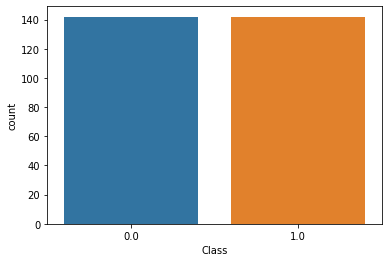

In [19]:
sns.countplot(new_cred["Class"]);

In [20]:
X = new_cred.drop(columns='Class', axis=1)
Y = new_cred['Class']
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
44229,1.052701,-0.494169,1.136549,0.935094,-1.310836,-0.325284,-0.651884,0.151463,1.181577,-0.220731,...,-0.071517,-0.244427,-0.007314,0.372537,0.172762,0.315955,-0.006654,0.035005,0.606032,0.635031
20483,-4.299105,-3.869931,-1.313339,1.520416,4.913948,1.484448,-1.749094,1.586840,-0.817312,-0.666900,...,0.422795,-0.873400,0.288786,0.894340,0.175480,-0.356774,0.287530,-0.541360,2.330784,0.138918
53771,-3.845978,-6.223465,-3.613206,-0.886076,-4.335467,7.004014,7.757993,0.039903,-2.403541,-1.858425,...,1.526411,0.222772,5.046707,0.774296,1.430011,-0.164104,-0.753176,0.203660,28.309888,0.193225
43342,-0.058743,0.558476,0.583915,0.607417,1.539524,4.778817,-1.554582,-0.536208,1.569498,-0.453284,...,1.241132,-1.052589,-0.170445,0.936855,1.088399,-0.165623,0.230290,0.195295,0.046331,-0.894784
15480,-0.630707,0.136166,1.589928,-0.073601,0.651752,1.900664,0.636799,0.478990,-0.203405,-0.510651,...,0.013767,0.283499,0.148025,-1.018706,-0.365528,0.310083,-0.101058,-0.189263,0.816978,0.785528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54172,0.385108,1.217620,-1.953872,2.087076,-1.144225,-0.576888,-2.582865,0.643230,-1.191233,-3.095094,...,0.594623,0.372144,-0.310456,-0.624065,0.840216,-0.159452,0.599482,0.288916,-0.227177,0.890175
55181,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,-0.552903,...,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,-0.314241,0.603299
55691,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,-7.502112,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,1.062624,-0.117860
56147,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,-12.744761,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,-0.314241,-0.964140


In [21]:
Y

44229    0.0
20483    0.0
53771    0.0
43342    0.0
15480    0.0
        ... 
54172    1.0
55181    1.0
55691    1.0
56147    1.0
56464    1.0
Name: Class, Length: 284, dtype: float64

<h2>Feature Correlation</h2>

In [22]:

# mask = np.zeros_like(cred_data.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)]= True


# f, axes = plt.subplots(ncols=2, figsize=(30,30))

# heatmap = sns.heatmap(cred_data.corr(),
#             mask = mask,
#             square = True,
#             linewidths = .5,
#             cmap = 'coolwarm',
#             cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
#             vmin = -1,
#             vmax = 1,
#             annot = True,
#             annot_kws = {"size": 8},
#             ax = axes[0])

# axes[0].set_title('Imbalance Correlation', size = 18, weight='bold', pad=20);

# heatmap = sns.heatmap(Data.corr(),
#             mask = mask,
#             square = True,
#             linewidths = .5,
#             cmap = 'coolwarm',
#             cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
#             vmin = -1,
#             vmax = 1,
#             annot = True,
#             annot_kws = {"size": 8},
#             ax = axes[1])

# axes[1].set_title('Balanced Correlation', size = 18, weight='bold', pad=20);


In [23]:
"""
f, axes = plt.subplots(ncols=4, figsize=(24,4))

sns.boxplot(Data, x="Class", y="V2", ax=axes[0])
axes[0].set_title("V2 vs Class Positive")

sns.boxplot(Data, x="Class", y="V4", a67x=axes[1])
axes[1].set_title("V4 vs Class Positive")

sns.boxplot(Data, x="Class", y="V11", ax=axes[2])
axes[2].set_title("V11 vs Class Positive")

sns.boxplot(Data, x="Class", y="V19", ax=axes[3])
axes[3].set_title("V19 vs Class Positive");


f, axes = plt.subplots(ncols=4, figsize=(24,4))

sns.boxplot(Data, x="Class", y="V17", ax=axes[0])
axes[0].set_title("V17 vs Class Negetive")

sns.boxplot(Data, x="Class", y="V14", ax=axes[1])
axes[1].set_title("V14 vs Class Negetive")

sns.boxplot(Data, x="Class", y="V12", ax=axes[2])
axes[2].set_title("V12 vs Class Negetive")

sns.boxplot(Data, x="Class", y="V10", ax=axes[3])
axes[3].set_title("V10 vs Class Negetive");

"""

'\nf, axes = plt.subplots(ncols=4, figsize=(24,4))\n\nsns.boxplot(Data, x="Class", y="V2", ax=axes[0])\naxes[0].set_title("V2 vs Class Positive")\n\nsns.boxplot(Data, x="Class", y="V4", a67x=axes[1])\naxes[1].set_title("V4 vs Class Positive")\n\nsns.boxplot(Data, x="Class", y="V11", ax=axes[2])\naxes[2].set_title("V11 vs Class Positive")\n\nsns.boxplot(Data, x="Class", y="V19", ax=axes[3])\naxes[3].set_title("V19 vs Class Positive");\n\n\nf, axes = plt.subplots(ncols=4, figsize=(24,4))\n\nsns.boxplot(Data, x="Class", y="V17", ax=axes[0])\naxes[0].set_title("V17 vs Class Negetive")\n\nsns.boxplot(Data, x="Class", y="V14", ax=axes[1])\naxes[1].set_title("V14 vs Class Negetive")\n\nsns.boxplot(Data, x="Class", y="V12", ax=axes[2])\naxes[2].set_title("V12 vs Class Negetive")\n\nsns.boxplot(Data, x="Class", y="V10", ax=axes[3])\naxes[3].set_title("V10 vs Class Negetive");\n\n'

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(284, 30) (227, 30) (57, 30)


In [25]:
# model training
models = {
    "LogisticRegression": LogisticRegression(solver='liblinear'),
    "KNearest": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(max_depth=4),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [32]:
from sklearn.model_selection import cross_val_score


def train_model():
    
    for key, model in models.items():
        model.fit(X_train,Y_train)
        #cv_score = cross_val_score(model,X_train,Y_train,cv=5)
        #print(key, "has a training Cross Val score of", round(cv_score.mean(), 2) * 100, "% accuracy score")
        AUC_ROC_Score= roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
        print(key, "has a AUCROC Score of", AUC_ROC_Score * 100)
        
train_model()

LogisticRegression has a AUCROC Score of 98.52216748768474
KNearest has a AUCROC Score of 97.9679802955665
RandomForest has a AUCROC Score of 98.39901477832514
DecisionTreeClassifier has a AUCROC Score of 93.04187192118228


In [33]:
model=LogisticRegression(solver='liblinear')


In [34]:
Y_train_pred = model.fit(X_train, Y_train).predict(X_train)
train_acc = accuracy_score(Y_train_pred, Y_train)
train_acc

0.986784140969163

In [35]:
Y_test_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test_pred, Y_test)
test_acc

#Y_test_pred=


0.9824561403508771

In [36]:
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix: \n", confusion_matrix(Y_test, Y_test_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        29
         1.0       1.00      0.96      0.98        28

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57

Confusion Matrix: 
 [[29  0]
 [ 1 27]]


In [37]:
check_data = (472,-3.0435406239976,-3.15730712090228,1.08846277997285,2.2886436183814,1.35980512966107,-1.06482252298131,0.325574266158614,-0.0677936531906277,-0.270952836226548,-0.838586564582682,-0.414575448285725,-0.503140859566824,0.676501544635863,-1.69202893305906,2.00063483909015,0.666779695901966,0.599717413841732,1.72532100745514,0.283344830149495,2.10233879259444,0.661695924845707,0.435477208966341,1.37596574254306,-0.293803152734021,0.279798031841214,-0.145361714815161,-0.252773122530705,0.0357642251788156,529)

check_data_np = np.asarray(check_data)

# reshape the numpy array
check_data_reshaped = check_data_np.reshape(1, -1)

# original class =  1
check = model.predict(check_data_reshaped)
print("Original Class: 1")
print(f"Prediction: {check[0]}")

Original Class: 1
Prediction: 1.0


C:\Users\ajayc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<h2> Hyperparameter Tuning </h2>